In [50]:
import psycopg2
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import json

database = 'fomc'
conn = psycopg2.connect("dbname=" + database + " user=abarciauskas")
cur = conn.cursor()

cur.execute("SELECT Doc1Id,Doc2Id,CosineSimilarity FROM alignments ORDER BY random()")
cosine_sims = cur.fetchall()

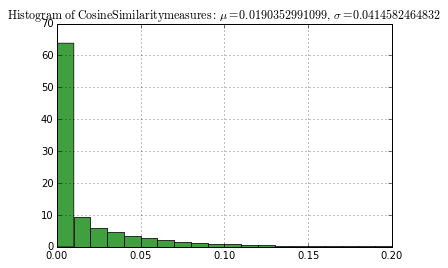

In [10]:
%matplotlib inline

cos_list = [float(cosine[2]) for cosine in cosine_sims]

cos_list[0:10]
# the histogram of the data
n, bins, patches = plt.hist(cos_list, 100, normed=1, facecolor='green', alpha=0.75)
mu = np.mean(cos_list)
sigma = np.std(cos_list)
plt.title(r'$\mathrm{Histogram\ of\ Cosine Similarity measures:}\ \mu=' + str(mu) + ',\ \sigma=' + str(sigma) + '$')
# Note: there is a value lower, ths has cut some extremes
plt.axis([0, 0.2, 0, 70])
plt.grid(True)

plt.show()

In [56]:
np.percentile(cos_list, np.arange(50,100,10))

array([ 0.        ,  0.00548797,  0.01599222,  0.03156454,  0.0598572 ])

In [33]:
very_similar_pairs = filter(lambda x: x[2] > 0.13, cosine_sims)

In [32]:
float(len(very_similar_pairs))/len(cosine_sims)

0.02174867529155615

In [34]:
import random
rand_pair = random.choice(very_similar_pairs)
rand_pair

(569, 70, Decimal('0.30502986908937574'))

In [54]:
sql = "SELECT Original FROM processed_documents WHERE Id = " + str(rand_pair[0]) + " OR Id = " + str(rand_pair[1]) + ";"
cur.execute(sql)
docs = cur.fetchall()
print docs[0]
print docs[1]

('Although a spike in energy prices lifted total consumer price inflation in December, readings on core inflation had edged lower in recent months.',)
('However, readings on core inflation had declined.',)
